# Objective : 
## Consolidated Model having 


1.   Image Normalization
2.   L2 Regularization
3. ReLU After Batch Normalization











In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


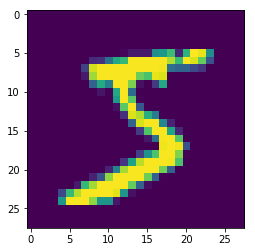

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from keras.callbacks import ModelCheckpoint

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1), use_bias=False, kernel_regularizer=regularizers.l2(0.001))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.001))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.001))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, use_bias=False, kernel_regularizer=regularizers.l2(0.001))) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.001))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.001))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, use_bias=False, kernel_regularizer=regularizers.l2(0.001))) #7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., use_bias=False, kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(lr * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0058), metrics=['accuracy'])




# model.fit(X_train, Y_train, batch_size=64, epochs=15, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

## CheckPoint Model

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
model_path="/content/gdrive/My Drive/Colab Notebooks/Assignment5"
model_file = model_path + '/consolidated.hd5'
checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Image Normalization +  ReLU After BN + L2 Regularization

In [16]:

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)


train_datagen = datagen.flow(X_train, Y_train, batch_size=64)
test_datagen = datagen.flow(X_test, Y_test)


# Creating instance of CheckPoint
# checkpoint = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# fits the model on batches with real-time data augmentation:
model.fit_generator(train_datagen, steps_per_epoch=len(X_train)/64, validation_data=test_datagen, validation_steps=1, epochs=40, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.0057999999.
938/937 [==============================] - 14s 15ms/step - loss: 0.2205 - acc: 0.9512 - val_loss: 0.0623 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to /content/gdrive/My Drive/Colab Notebooks/Assignment5/consolidated.hd5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0043972706.
938/937 [==============================] - 10s 11ms/step - loss: 0.1197 - acc: 0.9770 - val_loss: 0.1474 - val_acc: 0.9688

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0026845365.
938/937 [==============================] - 10s 11ms/step - loss: 0.0943 - acc: 0.9820 - val_loss: 0.0746 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0013717611.
938/937 [==============================] - 10s 11ms/step 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.040434711116552356, 0.9928]


##  25 Misclassified Images

[ 321  445  449  582  674  684  740  844  883  947 1014 1039 1226 1232
 1247 1260 1299 1337 1414 1444 1530 1621 1681 1709 1901 2018 2035 2109
 2118 2130 2135 2293 2329 2380 2447 2462 2597 2654 2720 2896 2939 3030
 3225 3289 3422 3475 3520 3727 3767 3780 3796 3808 3941 4497 4504 4571
 4639 4699 4740 4761 4807 4956 5165 5937 6505 6571 6576 6597 6625 6783
 8059 8408 9620 9638 9664 9679 9729 9839]
Found 78 incorrect labels


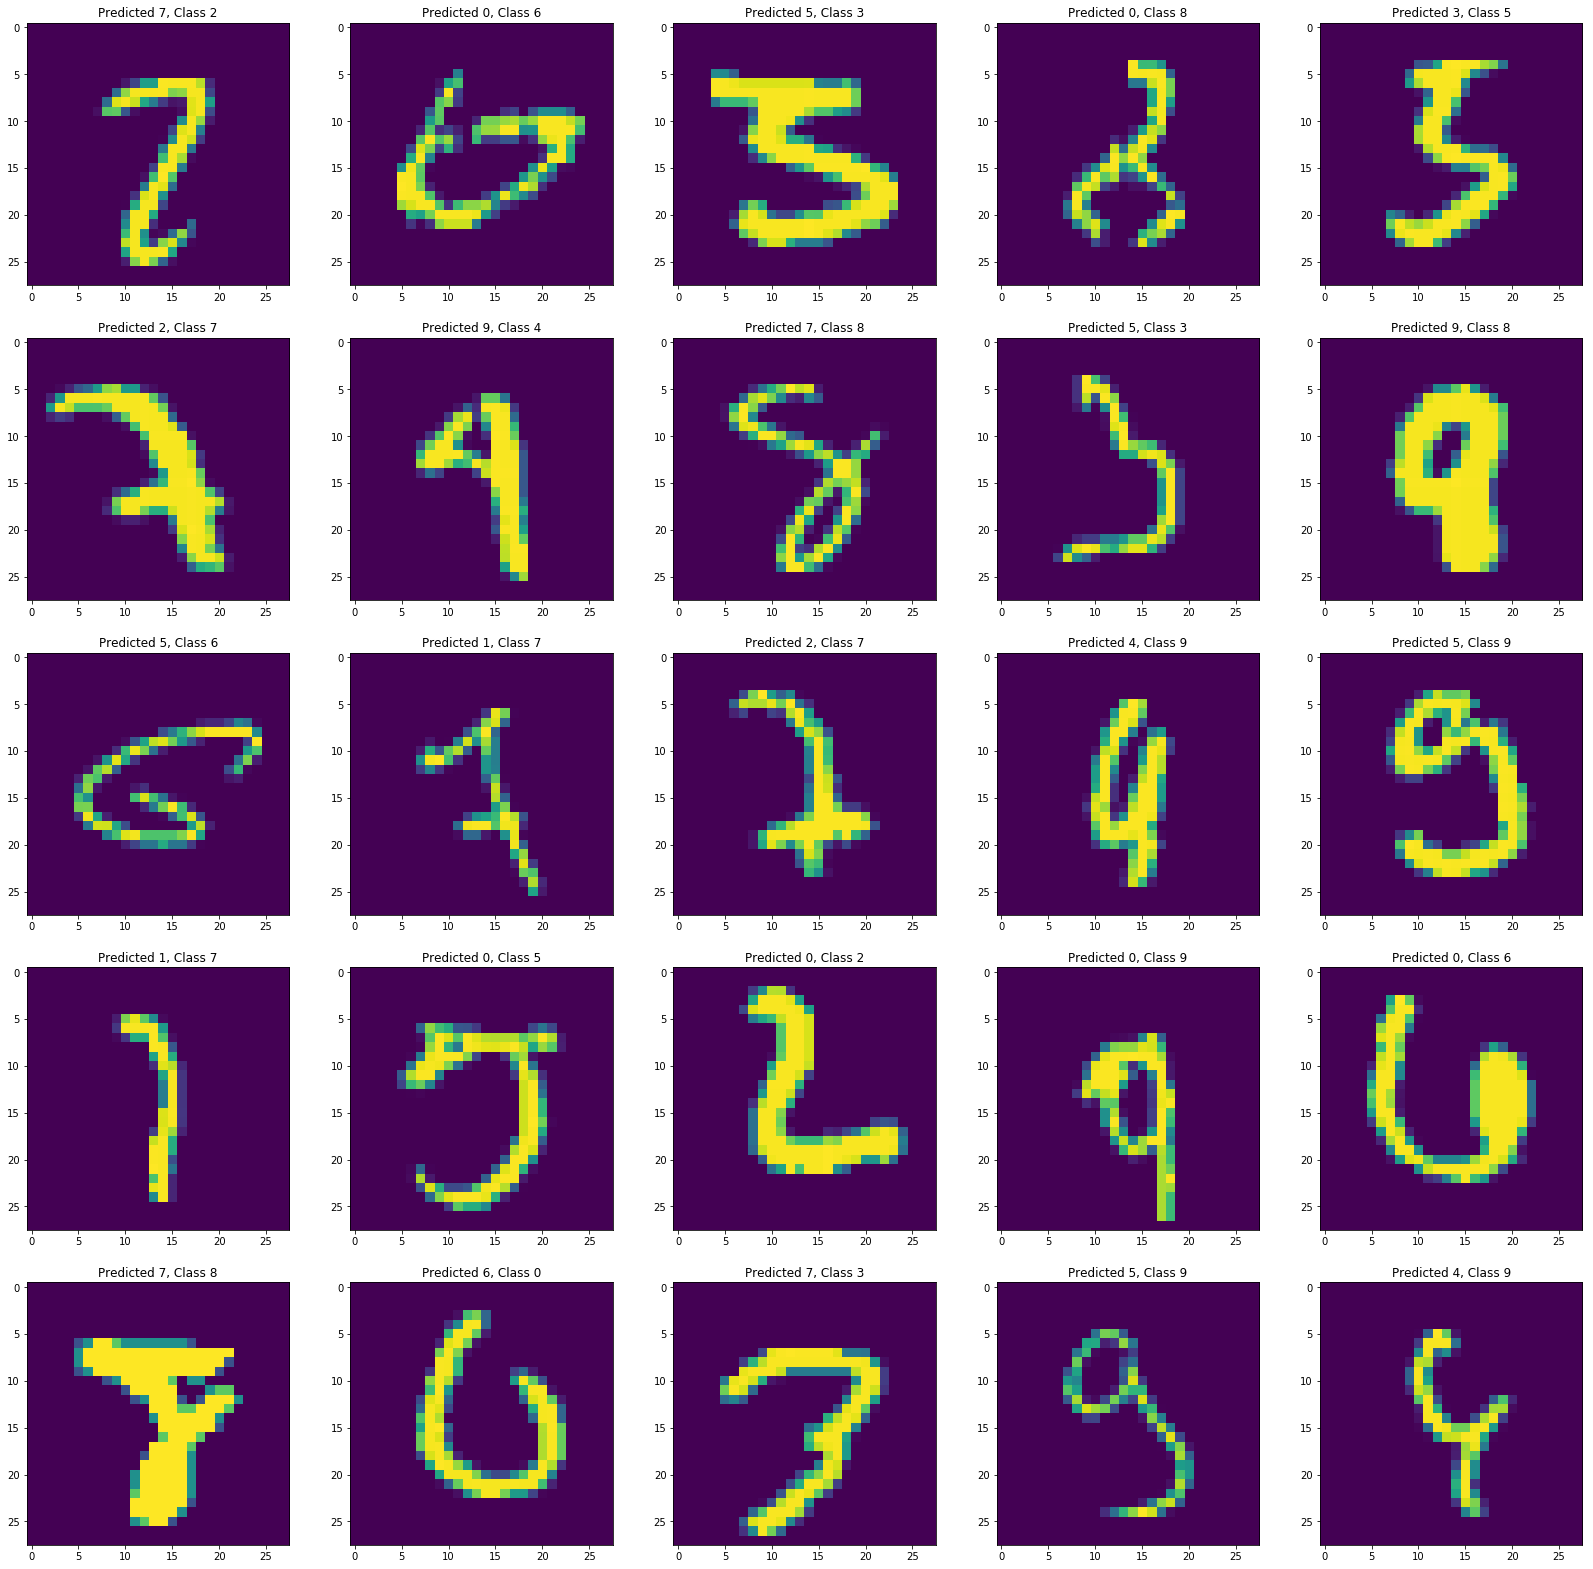

In [19]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)


import numpy as np

incorrect = np.where(y_pred!=y_test)[0]

print(incorrect)
print("Found %s incorrect labels" % (len(incorrect)))

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, 26):
  img_num = incorrect[i-1]
  img = X_test[img_num].reshape(28,28)
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.title("Predicted {}, Class {}".format(y_pred[img_num], y_test[img_num]))
plt.show()

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.59227070e-09 1.37294805e-07 2.37539143e-06 8.85016448e-07
  5.82426746e-11 6.49839682e-10 9.13896779e-14 9.99995828e-01
  1.83852877e-09 7.36451682e-07]
 [2.96232058e-04 8.74615391e-04 9.98811722e-01 3.87393754e-07
  5.93578136e-07 2.26366770e-09 1.61960161e-05 6.06553527e-08
  1.75995979e-07 1.56403708e-08]
 [1.07691631e-06 9.99927998e-01 3.16266824e-06 7.46576916e-08
  4.13223825e-05 3.80200703e-07 2.19405047e-05 3.08005906e-06
  2.73606560e-07 6.48485468e-07]
 [9.99480903e-01 5.02906303e-08 1.03545392e-06 9.86396529e-08
  7.49132766e-07 6.14181602e-07 5.13238192e-04 6.89192561e-08
  1.63043228e-06 1.53555152e-06]
 [6.43836051e-09 5.21692982e-08 1.04178177e-07 2.52113830e-10
  9.99962330e-01 2.58505856e-10 1.48554360e-08 8.63594849e-08
  5.74882222e-08 3.73750518e-05]
 [1.18873174e-06 9.99902129e-01 4.85540977e-06 2.27291501e-08
  5.95278943e-05 5.70618965e-08 1.62649594e-05 1.33196354e-05
  7.36755680e-07 1.93432356e-06]
 [1.68058401e-10 3.21082116e-05 5.76980983e-06 3.35928707e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()